# Taller Resolver los siguientes problemas, por el metodo de la biseccion, Punto fijo, newton, secante, etc.

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

2. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)




3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)



4.Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden




# Solucion 

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

\begin{equation}
f(x) = e^{x} - 2 - \cos(e^x-2) 
\end{equation}

In [ ]:
#librerias 
import numpy as np
import scipy as sp 
from scipy import optimize
import matplotlib.pylab as plt
import math

In [ ]:
g = lambda x: np.exp(x)-2
h = lambda x: np.cos( np.exp(x)-2)
f = lambda x: g(x) - h(x) #Función a la cual se le encuentra el cero

In [ ]:
x = np.linspace(-2, 2, 100) 

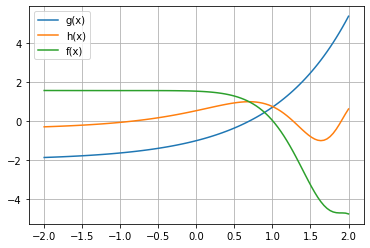

In [ ]:
#Utilizamos el grafico para ver donde la funcion f(x) se hace cero, y para ver que valores de a,b se pueden utilizar
plt.plot(x, g(x), label="g(x)")
plt.plot(x, h(x), label="h(x)")
plt.plot(x, h(x)-g(x), label="f(x)")
plt.grid()
plt.legend()

In [ ]:
#Comando de scipy que me ayuda a calcular la raiz de una funcion por el metodo de bisección
root = optimize.bisect(f, 1, 4)
print({root})

{1.007623971657722}


In [ ]:
# Metodo Newton Rapshod
#Comando de scipy que me ayuda a calcular la raiz de una funcion por el metodo de Newton Rapshod
root2 = optimize.newton(f, -2)  #El punto que se toma en este metodo no puede estar muy alejado del cero.
print({root})


{1.007623971657722}


In [ ]:
root-root2  # Analiza la precisión 

3.007923971657722

Punto 2.

\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}

\begin{equation}
f(\omega,t ) = 2\omega^2(x(t)+\sin \omega t )
\end{equation}


\begin{equation}
g(\omega,t ) = -g\left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) 
\end{equation}



In [ ]:
f = lambda omega : 2*omega**2 * (0.51+np.sin(omega))  # Definicion de la fucion f(w,t)
g = lambda omega : -9.76* 0.5*(np.exp(omega)-np.exp(-omega)) # Definicion de la fucion g(w,t)

h = lambda omega : f(omega)-g(omega) # Función x(t) a la cual le encontraremos las raices
omega = np.linspace(-2*np.pi, 2*np.pi) 


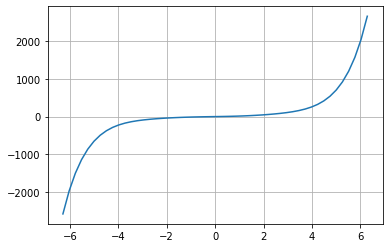

In [ ]:
plt.figure()
plt.plot(omega, h(omega) )
plt.grid()

In [ ]:
# Comando de scipy que me ayuda a calcular la raiz de una funcion por el metodo de Newton Rapshod
root = optimize.newton(h, 2)
print({root})

{6.113797822835222e-17}


Punto 3.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies

\begin{equation}
k(h) = V - L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)= 0
\end{equation}

\begin{equation}
f(h) =  V
\end{equation}

\begin{equation}
g(h) = L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)= 0
\end{equation} 





In [ ]:
f = lambda h: 12.4  # Definición de la función f(x)
g = lambda h:  10*((0.5*np.pi*1)-(1*np.arcsin(h))-h*(1-(h**2))**0.5) # Definición de la función g(x)
k = lambda h: f(h) - g(h) # Función a la cual se le encuentra el cero
h = np.linspace(0, 1,50) # Rango de la función.  

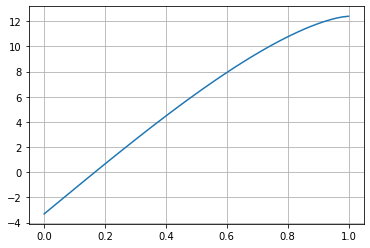

In [ ]:
# Gráfico
plt.figure()
plt.plot(h, k(h) )
plt.grid()

In [ ]:
# Comando de scipy que ayuda a calcular la raiz de una función por el método de Newton Rapshod
root = optimize.newton(k, 0.4)
print({root})

{0.16616603465836813}


In [ ]:
#Comando de scipy que ayuda a calcular la raiz de una función por el método de bisección
root = optimize.bisect(k, 0.1, 0.4)
print({root})

{0.16616603465918162}


In [ ]:
# Profundidad del agua r-h
p = 1- 0.16616603465836813
print(p)

0.8338339653416319


Punto 4.


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados

In [ ]:
# Datos
L=89
h=49
D=55
BT=np.deg2rad(11.5) 


In [ ]:
# Cálculo de A
A = L*np.sin(BT)
print(A)

17.74374616313055


In [ ]:
# Cálculo de B
B = L*np.cos(BT)
print(B)

87.21329871125383


In [ ]:
# Cálculo de C
C = ((h + (0.5*D))*np.sin(BT)) - (0.5*D*np.tan(BT))
print(C)


9.656708748763851


In [ ]:
# Cálculo de E
E = ((h + (0.5*D))*np.cos(BT) - (0.5*D))
print(E)

47.464239903493464




\begin{equation}
f(\alpha) = (A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

In [ ]:
f = lambda a:  A*np.sin(a)*np.cos(a) # Definición de la fución f(a)
g = lambda a:  B*((np.sin(a)**2))    # Definición de la fución  g(a)
h = lambda a:  C*np.cos(a)           # Definición de la fución  h(a)
j = lambda a:  E*np.sin(a)           # Definición de la fución  j(a)
k = lambda a: f(a) + g(a) - h(a)- j(a) # Función a la cual se le encuentra el cero
a = np.linspace(0, 1,50) # Rango de la función.  

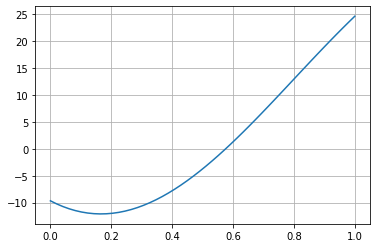

In [ ]:
# Gráfico
plt.figure()
plt.plot(a, k(a) )
plt.grid()

In [ ]:
# Comando de scipy que me ayuda a calcular la raiz de una función por el método de Newton Rapshod
root = optimize.newton(k, 0.6)
print({root})

{0.5754730121944055}


In [ ]:
#Comando de scipy que me ayuda a calcular la raiz de una función por el método de bisección
root = optimize.bisect(k, 0.4, 0.6)
print({root})

{0.5754730121945613}


In [ ]:
# Corvitiendo alpha a radianes
(0.5754730121945613*180)/np.pi

32.97217482242892




5. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image


In [ ]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin


In [ ]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  


In [ ]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


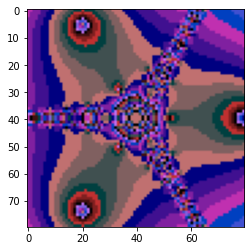

In [ ]:
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
